In [5]:
def read_data(filename):
  data = {"PG01" : [], "PG02" : [], "PG03" : []}
  with open(filename, 'r') as file:
    lines = file.readlines()
    for line in lines[24:]:
      if line.startswith(("PG01", "PG02", "PG03")):
        parts = line.split()
        satellite = parts[0]
        x = float(parts[1])
        y = float(parts[2])
        z = float(parts[3])
        time = float(parts[4])
        data[satellite].append((x, y, z, time))
  return data

data = read_data("IGS0OPSRAP_20240530000_01D_15M_ORB.SP3")

In [6]:
print(data["PG01"])
print(data["PG02"])
print(data["PG03"])

[(23571.025393, 12541.936353, 1227.13392, 170.539676), (23514.944084, 12674.98625, -1667.022743, 170.54113), (23172.781538, 12675.303046, -4533.17083, 170.542576), (22535.412581, 12581.888401, -7323.384962, 170.543986), (21602.39862, 12435.439776, -9991.313799, 170.545381), (20382.053699, 12276.677056, -12492.867242, 170.546771), (18891.20438, 12144.693351, -14786.855556, 170.548182), (17154.656077, 12075.386289, -16835.576971, 170.54962), (15204.38721, 12100.022189, -18605.351188, 170.551072), (13078.500363, 12243.980378, -20066.996715, 170.552513), (10819.966565, 12525.718814, -21196.250085, 170.554001), (8475.204591, 12955.995197, -21974.124889, 170.555463), (6092.542041, 13537.370106, -22387.208155, 170.556891), (3720.608617, 14264.010344, -22427.891058, 170.558427), (1406.714578, 15121.801859, -22094.530309, 170.559953), (-804.731363, 16088.772264, -21391.535919, 170.561547), (-2873.710433, 17135.81333, -20329.380508, 170.563076), (-4765.935761, 18227.683949, -18924.524992, 170.56

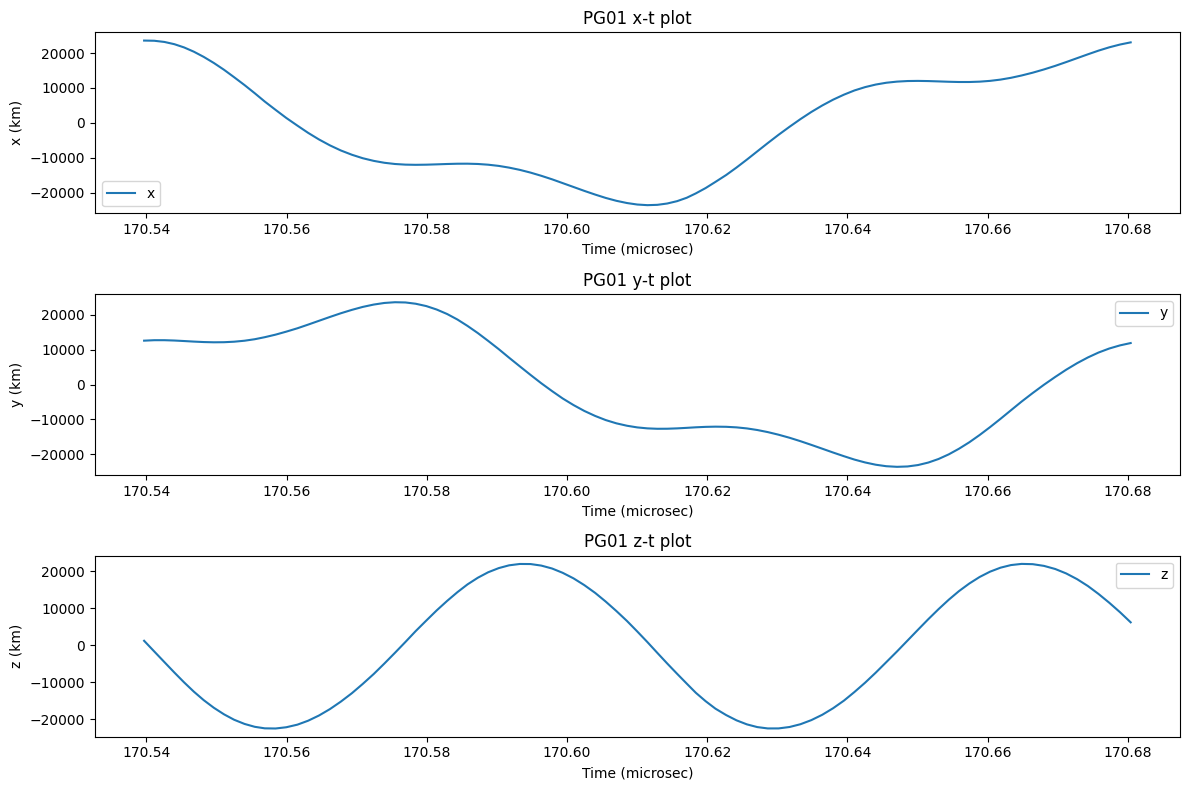

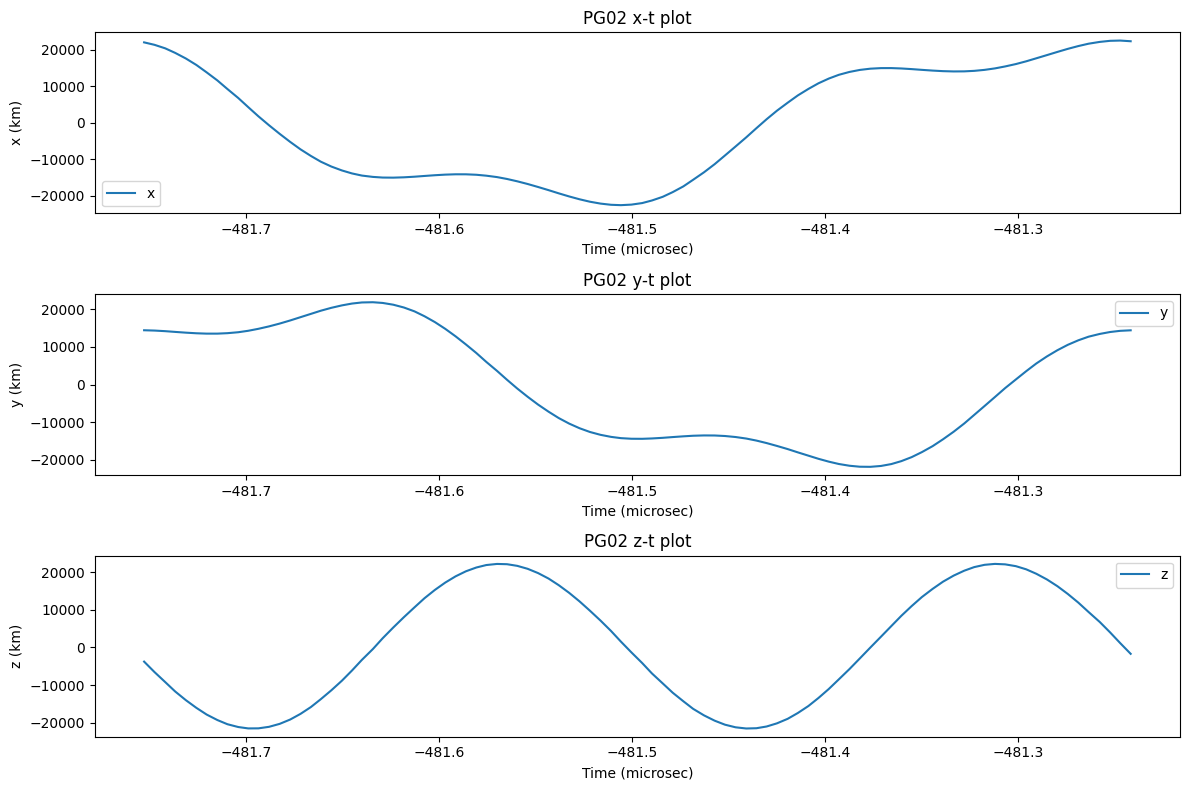

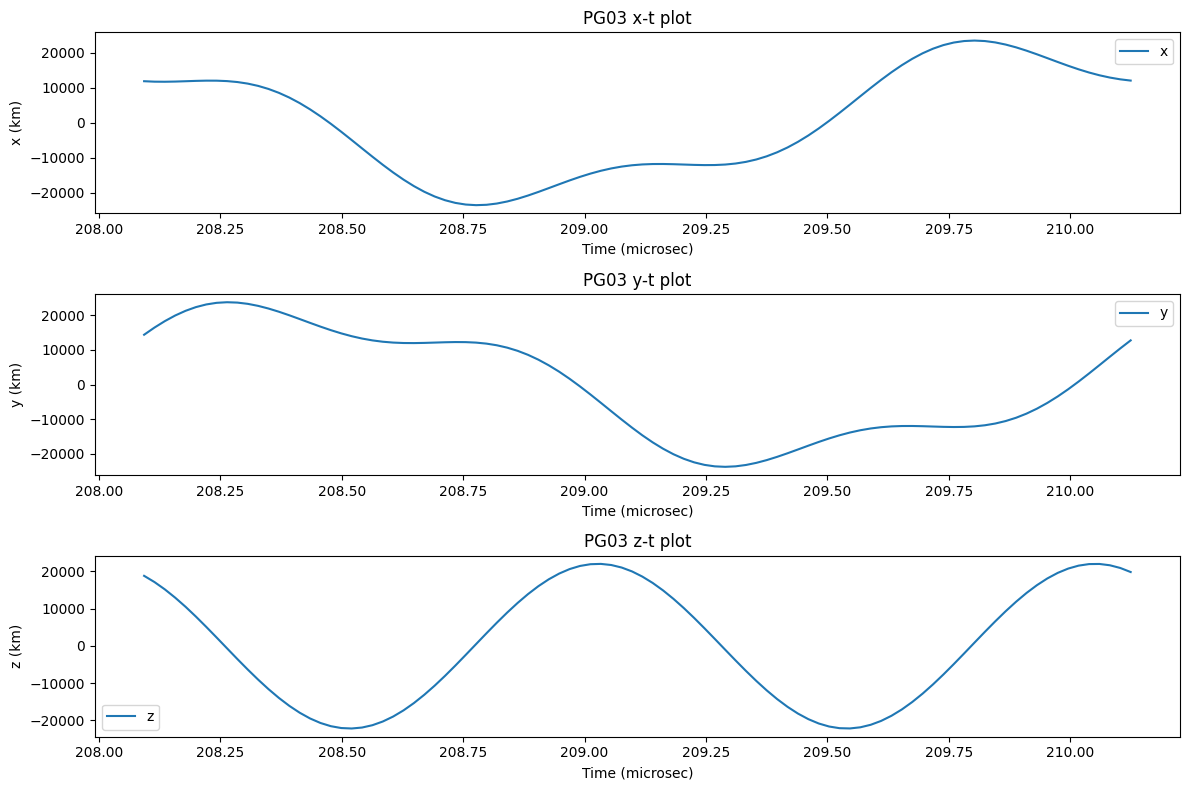

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, satellite):
    times = [i[3] for i in data[satellite]]
    x = [i[0] for i in data[satellite]]
    y = [i[1] for i in data[satellite]]
    z = [i[2] for i in data[satellite]]
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(311)
    plt.plot(times, x, label='x')
    plt.title(f'{satellite} x-t plot')
    plt.xlabel('Time (microsec)')
    plt.ylabel('x (km)')
    plt.legend()
    
    plt.subplot(312)
    plt.plot(times, y, label='y')
    plt.title(f'{satellite} y-t plot')
    plt.xlabel('Time (microsec)')
    plt.ylabel('y (km)')
    plt.legend()
    
    plt.subplot(313)
    plt.plot(times, z, label='z')
    plt.title(f'{satellite} z-t plot')
    plt.xlabel('Time (microsec)')
    plt.ylabel('z (km)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_data(data, "PG01")
plot_data(data, "PG02")
plot_data(data, "PG03")

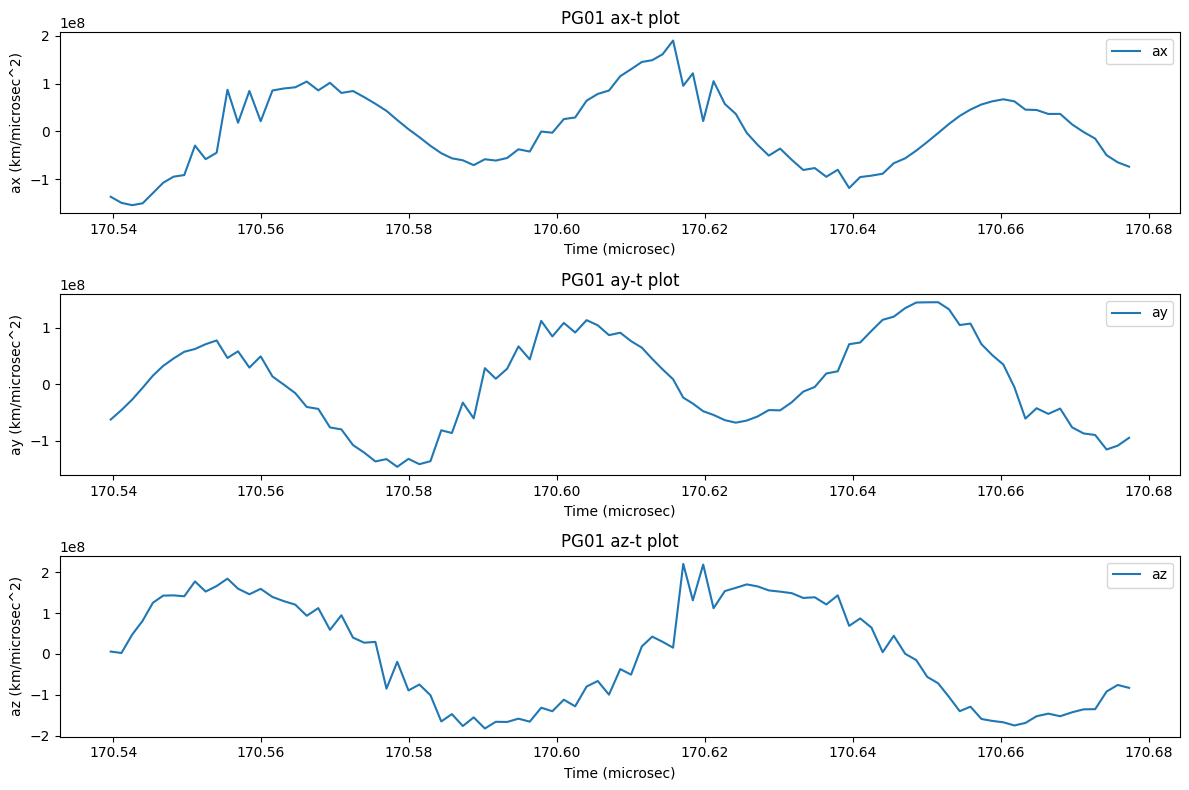

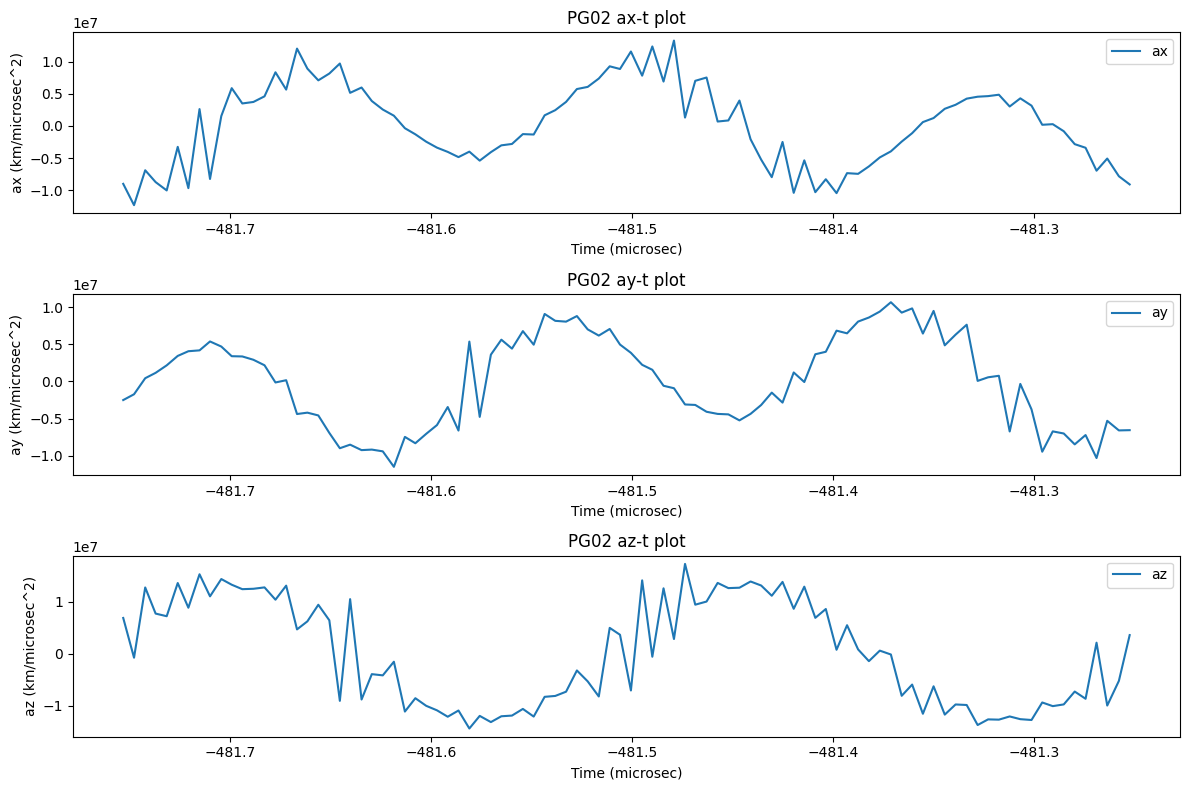

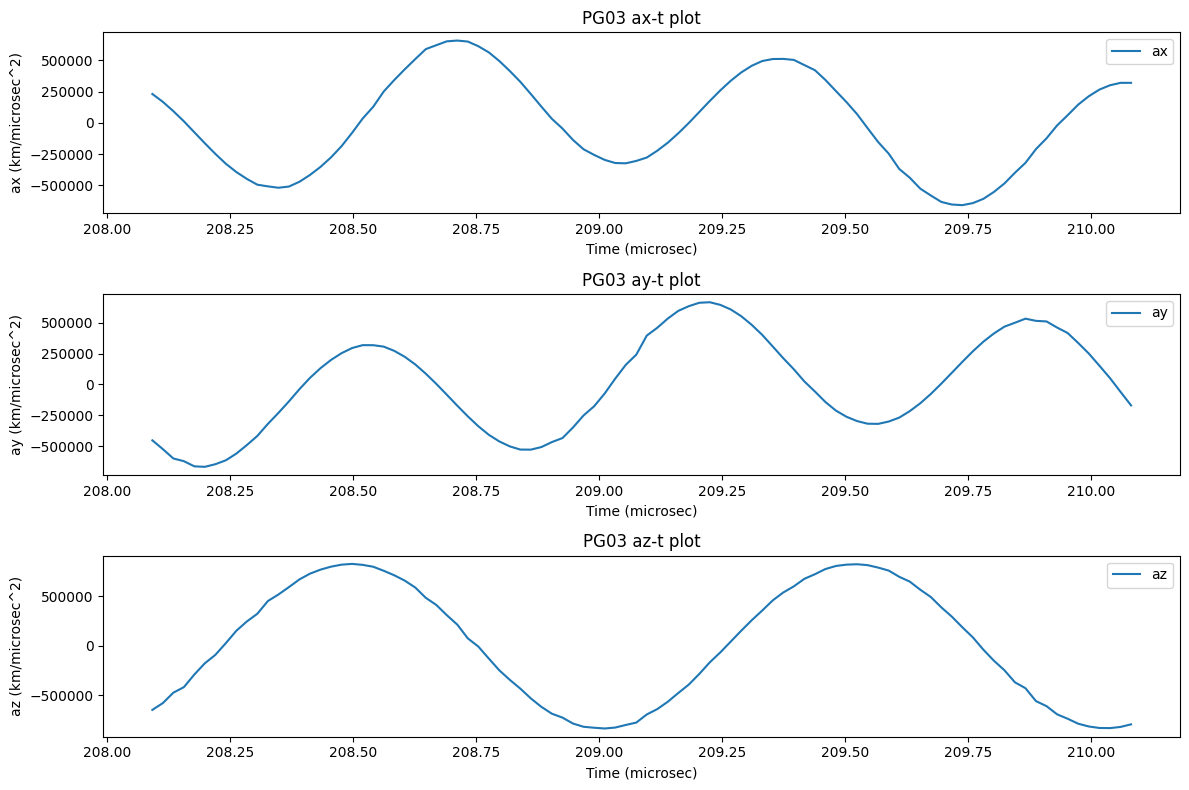

In [9]:
def plot_acceleration(data, satellite):
    times = np.array([i[3] for i in data[satellite]])
    x = np.array([i[0] for i in data[satellite]])
    y = np.array([i[1] for i in data[satellite]])
    z = np.array([i[2] for i in data[satellite]])
    
    vx = np.diff(x) / np.diff(times)
    vy = np.diff(y) / np.diff(times)
    vz = np.diff(z) / np.diff(times)
    
    ax = np.diff(vx) / np.diff(times[:-1])
    ay = np.diff(vy) / np.diff(times[:-1])
    az = np.diff(vz) / np.diff(times[:-1])
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(311)
    plt.plot(times[:-2], ax, label='ax')
    plt.title(f'{satellite} ax-t plot')
    plt.xlabel('Time (microsec)')
    plt.ylabel('ax (km/microsec^2)')
    plt.legend()
    
    plt.subplot(312)
    plt.plot(times[:-2], ay, label='ay')
    plt.title(f'{satellite} ay-t plot')
    plt.xlabel('Time (microsec)')
    plt.ylabel('ay (km/microsec^2)')
    plt.legend()
    
    plt.subplot(313)
    plt.plot(times[:-2], az, label='az')
    plt.title(f'{satellite} az-t plot')
    plt.xlabel('Time (microsec)')
    plt.ylabel('az (km/microsec^2)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_acceleration(data, "PG01")
plot_acceleration(data, "PG02")
plot_acceleration(data, "PG03")